# **Import Library**

In [ ]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

# **Membaca list fitur**

In [ ]:
with open("kddcup.names", 'r') as f: 
    print(f.read()) 

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
 
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""

columns =[] 
for c in cols.split(', '): 
	if(c.strip()): 
	  columns.append(c.strip()) 

columns.append('target') 
print(len(columns)) 

42


In [ ]:
 with open("training_attack_types", 'r') as f: 
	print(f.read()) 


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l



In [ ]:
 
attacks_types = { 
	'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 


# **Dataset KDD**

In [ ]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns) 

# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head() 



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df.shape 

(494021, 43)

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features 
num_cols = df._get_numeric_data().columns 

cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 

cate_cols 



['protocol_type', 'flag', 'service']

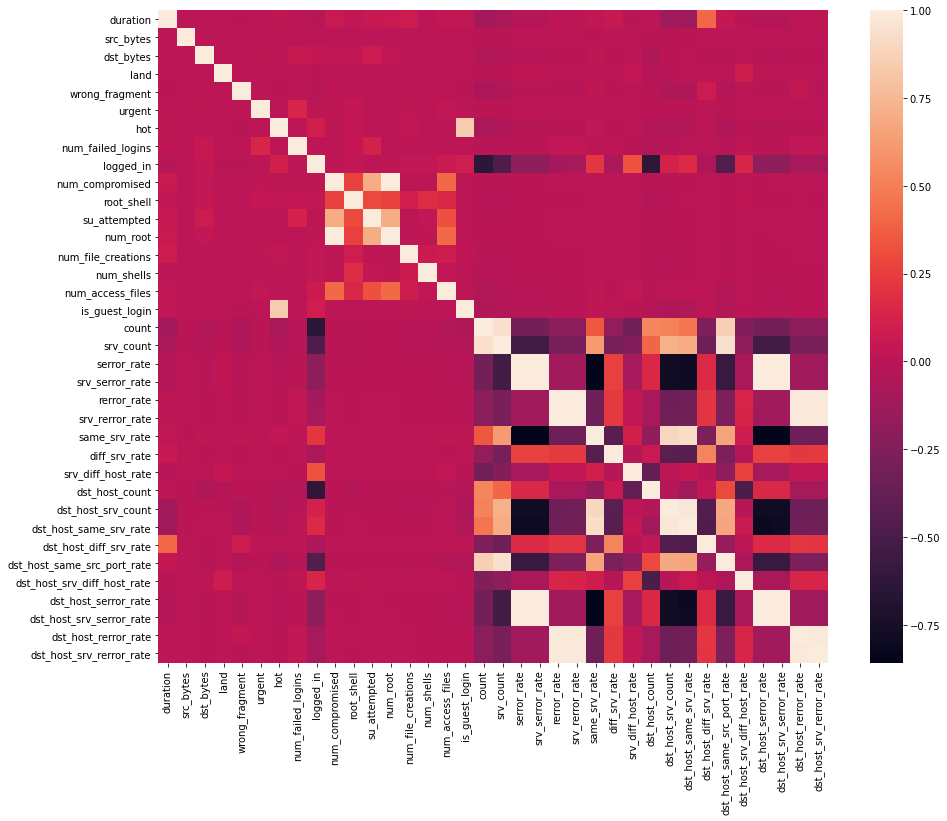

In [ ]:
 

df = df.dropna('columns')# drop columns with NaN 

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values 

corr = df.corr() 

plt.figure(figsize =(15, 12)) 

sns.heatmap(corr) 

plt.show() 



In [ ]:
 

# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 



In [ ]:
 
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap) 


In [ ]:
 
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 



In [ ]:
 
df.drop('service', axis = 1, inplace = True) 


# **Spliiting Train dan Test Data** 

In [ ]:
 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 



In [ ]:
 
# Splitting the dataset 
df = df.drop(['target', ], axis = 1) 
print(df.shape) 

# Target variable and train set 
y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 

sc = MinMaxScaler() 
X = sc.fit_transform(X) 

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 



(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
  
clfr = RandomForestClassifier(n_estimators = 30) 
start_time = time.time() 
clfr.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time)

Training time:  9.466190576553345


In [ ]:
start_time = time.time() 
y_test_pred = clfr.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  1.0527193546295166


In [ ]:
print("Train score is:", clfr.score(X_train, y_train)) 
print("Test score is:", clfr.score(X_test, y_test)) 

Train score is: 0.9999667667691862
Test score is: 0.9996442307102504


# **Decision Tree** 

In [ ]:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier 
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4) 
start_time = time.time() 
clfd.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 
 

Training time:  1.268632173538208


In [ ]:
 
start_time = time.time() 
y_test_pred = clfd.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.04451346397399902


In [ ]:
 
print("Train score is:", clfd.score(X_train, y_train)) 
print("Test score is:", clfd.score(X_test, y_test)) 



Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


# **BAR PLOT Akurasi Training Decision Tree & Random Forest**

<BarContainer object of 2 artists>

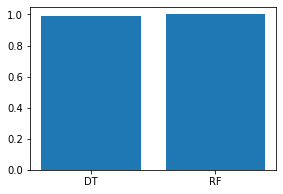

In [ ]:
names = ['DT', 'RF'] 
values = [ 0.9905829108684749, 0.9999667667691862] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 

# **BAR PLOT Akurasi Testing Decision Tree & Random Forest** 

<BarContainer object of 2 artists>

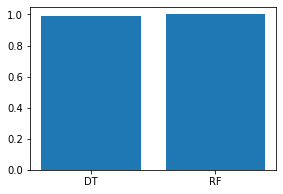

In [ ]:
 
names = ['DT', 'RF'] 
values = [0.9905230421954646, 0.9996442307102504] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 



# **BAR PLOT TRAINING TIME Decision Tree & Random Forest**

<BarContainer object of 2 artists>

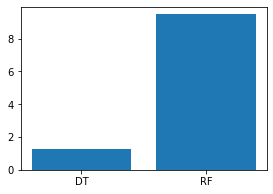

In [ ]:
names = ['DT', 'RF'] 
values = [1.268632173538208, 9.466190576553345] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

# **BAR PLOT TESTING TIME Decision Tree & Random Forest**

<BarContainer object of 2 artists>

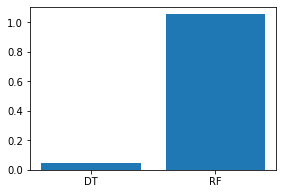

In [ ]:
names = ['DT', 'RF'] 
values = [0.04451346397399902, 1.0527193546295166] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 
 